In [1]:
#导入工具包
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
#读取数据集
df_train = pd.read_csv('./train_data.CSV')
df_test = pd.read_csv('./test_data.CSV')
x_train = df_train[['Z1','Z2','r1','r2','R1','R2','N1','N2','EP1','EP2','EA1','EA2','IE1','IE2']]
y_train = df_train['△G*o']
x_test = df_test[['Z1','Z2','r1','r2','R1','R2','N1','N2','EP1','EP2','EA1','EA2','IE1','IE2']]
y_test = df_test['△G*o']
#模型GBR
kf = KFold(n_splits=10,shuffle = True,random_state=10)
clf =  GradientBoostingRegressor()
n_estimators = [60,80,90,100,200,300,400,500,600,700,800]
random_state =[0,5,10,20,30]
learning_rate = [0.08,0.1,0.12,0.15,0.2,0.3,0.4,0.5]
max_depth = [1,2,3,4,5]
loss = ['huber']
param_grid = {'n_estimators':n_estimators,'random_state':random_state,'learning_rate':learning_rate,'max_depth':max_depth,'loss':loss}
clf_best = GridSearchCV(clf,param_grid,cv=kf,scoring='neg_mean_squared_error')                                    
clf_best.fit(x_train,y_train)

y_train_pred=clf_best.predict(x_train)
y_test_pred=clf_best.predict(x_test)
train_score_mse = mean_squared_error(y_train,y_train_pred)
test_score_mse = mean_squared_error(y_test,y_test_pred)
train_score_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
test_score_rmse  =  np.sqrt(mean_squared_error(y_test,y_test_pred))
train_score_mae = mean_absolute_error(y_train,y_train_pred)
test_score_mae = mean_absolute_error(y_test,y_test_pred)
train_r2_score = r2_score(y_train,y_train_pred)
test_r2_score = r2_score(y_test,y_test_pred)
print('MSE',train_score_mse,test_score_mse)
print('RMSE',train_score_rmse,test_score_rmse)
print('MAE',train_score_mae,test_score_mae)
print('R2',train_r2_score,test_r2_score)
print("最好的参数：",clf_best.best_params_)

MSE 0.0036974132556393067 0.6110552902092351
RMSE 0.06080635867768524 0.7817002559864203
MAE 0.030414733150452303 0.515198789420224
R2 0.9994921362341294 0.9433494376005702
最好的参数： {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 2, 'n_estimators': 800, 'random_state': 20}


In [2]:
import joblib
joblib.dump(clf_best.best_estimator_, './gbr.pkl')

['./gbr.pkl']

meta NOT subset; don't know how to subset; dropped


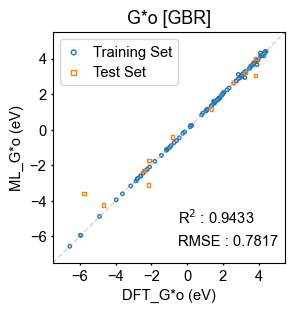

In [3]:

from matplotlib.pyplot import MultipleLocator
font={'family':"Arial",'size':'10.667'}
plt.rc('font',**font)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize = (3, 3))

ax.scatter(y_train, y_train_pred, label="Training Set",alpha=1, marker='o', s=6, facecolor='none', color='#1f77b4')
ax.scatter(y_test, y_test_pred, label='Test Set',alpha=1, marker='s', s=6, facecolor='none', color='#ff7f0e')
ax.tick_params(axis='both', labelcolor='black', width=1, length=1.1, color='black', which='major')
#ax.tick_params(axis='both', labelcolor='black', width=1, length=2, color='black', which='minor')
#ax.xaxis.set_minor_locator(MultipleLocator(1))
y_major_locator=MultipleLocator(2)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(2)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xlim(xmin= -7.5,xmax = 5.5)
ax.set_ylim(ymin= -7.5,ymax = 5.5)
line=ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',c='#A9A9A9',alpha=0.5)
plt.setp(line, linewidth=1) 
plt.title('G*o [GBR]')
plt.xticks(fontsize=10.667)
plt.yticks(fontsize=10.667)
plt.xlabel('DFT_G*o (eV)')
plt.ylabel('ML_G*o (eV)')
plt.legend(markerscale=1.4,frameon=True,fontsize=10.667,labelspacing=0.4,handlelength=1)
plt.text(-0.5,-6.5,'R$^2$ : 0.9433\nRMSE : 0.7817',fontsize=10.667,linespacing=1.7)
#plt.savefig('gbr_go.eps',dpi=600, bbox_inches = "tight")  
#plt.savefig('gbr_go.png',dpi=600, bbox_inches = "tight")
plt.savefig('gbr_go.pdf',dpi=600, bbox_inches = "tight")
plt.show()

meta NOT subset; don't know how to subset; dropped


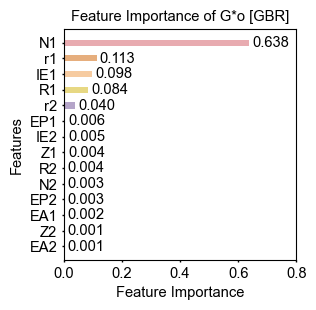

In [4]:
importance = clf_best.best_estimator_.feature_importances_
    
col = zip(x_train, importance)

# 根据特性的重要性排序并保存到数据框架中
importance_data = pd.DataFrame(col, columns=['x_train', 'importance'])
importance_data_asc = importance_data.sort_values('importance')

# plot the importance data
font={'family':"Arial",'size':'10.6667'}
plt.rc('font',**font)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
fig = plt.figure(figsize=(3, 3))
plt.barh(y=importance_data_asc['x_train'], width=importance_data_asc['importance'], height=0.4,color=['#E7D883','#F6CBA0','#E6AE7D','#E8ABB0','#B5A5C9'])
plt.xlim(xmax =0.8)
plt.tick_params(axis='y', labelcolor='black', width=1, length=1.1, color='black')
plt.tick_params(axis='x', labelcolor='black', width=1, length=1.1, color='black')
plt.rc('xtick', labelsize=10.667)
plt.rc('ytick', labelsize=10.667)
plt.ylabel("Features", fontsize=10.667)
plt.xlabel("Feature Importance", fontsize=10.667)
plt.title("Feature Importance of G*o [GBR]", fontsize=10.667)

for a,b in zip( importance_data_asc['importance'],importance_data_asc['x_train']):
    plt.text(a+0.01, b,'%.3f'%float(a),fontsize=10.667,va='center')

#plt.savefig('feature_importance_gbr.eps',dpi=600, bbox_inches = "tight")  
#plt.savefig('feature_importance_gbr.png',dpi=600, bbox_inches = "tight")
plt.savefig('feature_importance_gbr.pdf',dpi=600, bbox_inches = "tight")
plt.show()

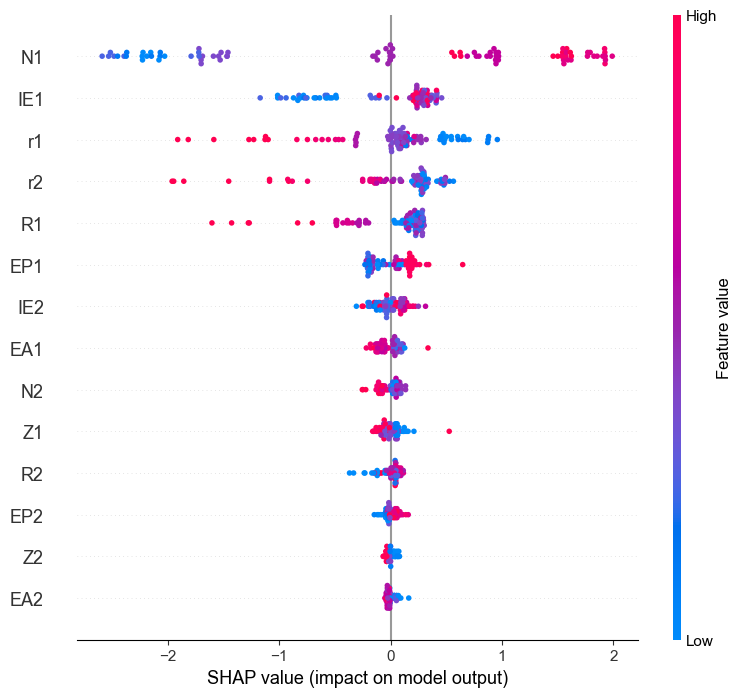

meta NOT subset; don't know how to subset; dropped


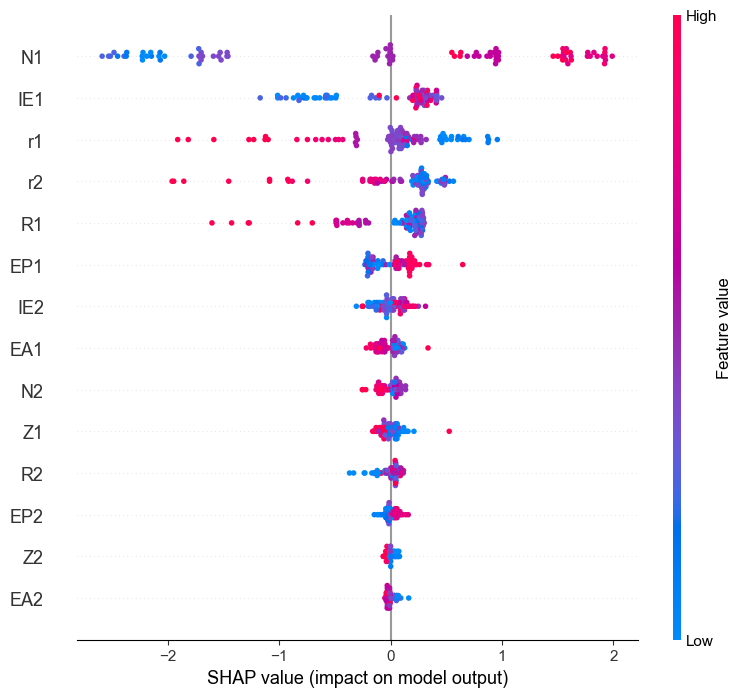

In [5]:
import shap
explainer = shap.TreeExplainer(clf_best.best_estimator_) 
feature = x_train
shap_values = explainer.shap_values(feature) 
shap.summary_plot(shap_values, feature)
fig = shap.summary_plot(shap_values, feature, show=False)
plt.savefig('shap_gbr.pdf')

Glyph 9651 (\N{WHITE UP-POINTING TRIANGLE}) missing from current font.
Glyph 9651 (\N{WHITE UP-POINTING TRIANGLE}) missing from current font.
meta NOT subset; don't know how to subset; dropped
Glyph 9651 (\N{WHITE UP-POINTING TRIANGLE}) missing from current font.


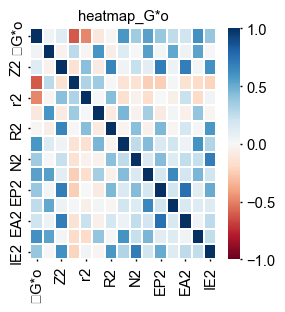

In [6]:
font={'family':"Arial",'size':'10.6667'}
plt.rc('font',**font)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.subplots(figsize = (3,3))
sns.heatmap(df_train.corr(method='pearson'),linewidths=0.1,vmin=-1,vmax=1.0, square=False,linecolor='white', annot=False,cmap='RdBu',annot_kws={"fontsize":10.667})
plt.title('heatmap_G*o',fontsize=10.667)
plt.tick_params(axis='y', labelcolor='black', width=1, length=1.1, color='black')
plt.tick_params(axis='x', labelcolor='black', width=1, length=1.1, color='black')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=10.667, labelcolor='black', width=1, length=1.1, color='black')
#plt.savefig('heatmap_gbr.eps',dpi=600, bbox_inches = "tight")  
#plt.savefig('heatmap_gbr.png',dpi=600, bbox_inches = "tight")
plt.savefig('heatmap_gbr.pdf',dpi=600, bbox_inches = "tight")
plt.show()